# TP OpenCV - Premiers pas avec le traitement d'images
## Exercices corrigés en Python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# Configuration pour afficher les images
def afficher_image(image, titre="Image", cmap='gray'):
    """Fonction utilitaire pour afficher une image"""
    plt.figure(figsize=(8, 6))
    if len(image.shape) == 3:
        # Image couleur BGR -> RGB pour matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        # Image en niveaux de gris
        plt.imshow(image, cmap=cmap)
    plt.title(titre)
    plt.axis('off')
    plt.show()

def afficher_images_cote_a_cote(img1, img2, titre1="Image 1", titre2="Image 2", cmap='gray'):
    """Affiche deux images côte à côte"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    if len(img1.shape) == 3:
        axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    else:
        axes[0].imshow(img1, cmap=cmap)
    axes[0].set_title(titre1)
    axes[0].axis('off')
    
    if len(img2.shape) == 3:
        axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    else:
        axes[1].imshow(img2, cmap=cmap)
    axes[1].set_title(titre2)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

## Exercice 1 : Inverser une image
Fonction d'inversion des niveaux de gris : inv(x) = 1 - x

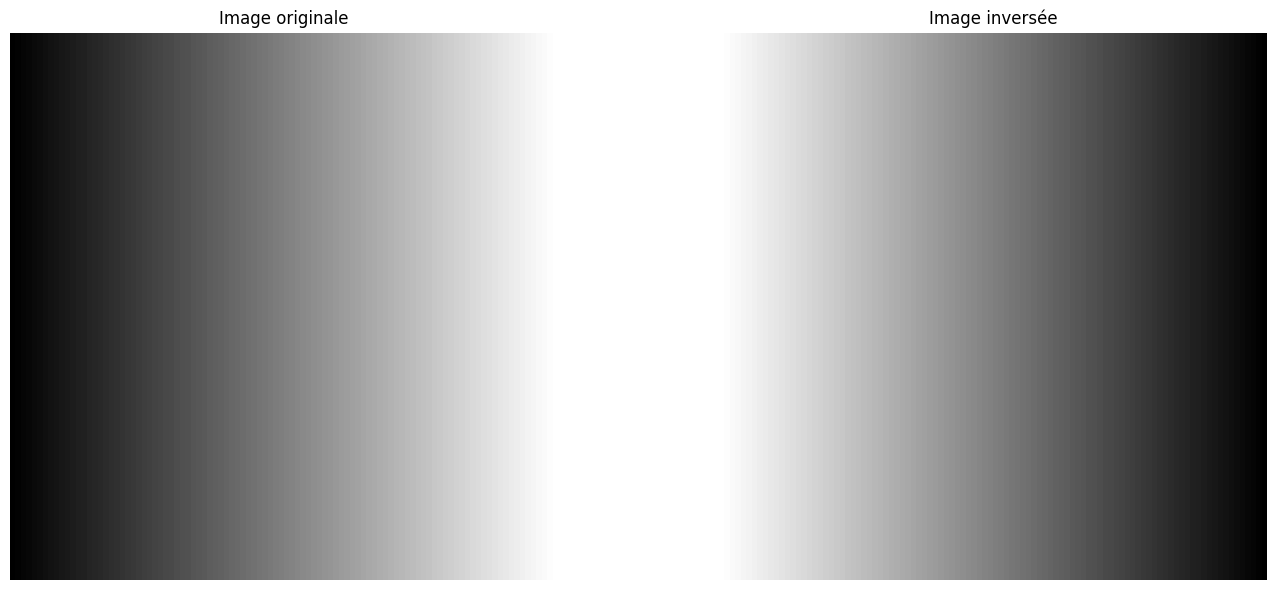

Exercice 1 complété !


In [3]:
def inverse(image):
    """
    Inverse les niveaux de gris d'une image.
    Pour une image CV_32F (valeurs entre 0 et 1) : inv(x) = 1 - x
    Pour une image CV_8U (valeurs entre 0 et 255) : inv(x) = 255 - x
    
    Args:
        image: Image d'entrée (Mat)
    
    Returns:
        Image inversée
    """
    # Créer une copie de l'image pour ne pas modifier l'originale
    image_inversee = image.copy()
    
    # Vérifier le type de l'image
    if image.dtype == np.float32:
        # Pour les images en float32 (valeurs entre 0 et 1)
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                image_inversee[y, x] = 1.0 - image[y, x]
    elif image.dtype == np.uint8:
        # Pour les images en uint8 (valeurs entre 0 et 255)
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                image_inversee[y, x] = 255 - image[y, x]
    
    return image_inversee

# Version optimisée sans boucles (vectorisée)
def inverse_vectorise(image):
    """
    Version vectorisée de l'inversion d'image (plus rapide)
    """
    if image.dtype == np.float32:
        return 1.0 - image
    elif image.dtype == np.uint8:
        return 255 - image
    return image

# Test avec une image synthétique
# Créer une image de test en niveaux de gris
height, width = 100, 100
image_test = np.zeros((height, width), dtype=np.float32)

# Créer un dégradé
for y in range(height):
    for x in range(width):
        image_test[y, x] = x / width

# Inverser l'image
image_test_inversee = inverse_vectorise(image_test)

# Afficher les résultats
afficher_images_cote_a_cote(image_test, image_test_inversee, 
                            "Image originale", "Image inversée")

print("Exercice 1 complété !")

## Exercice 2 : Couleur
Charger une image couleur et générer son négatif

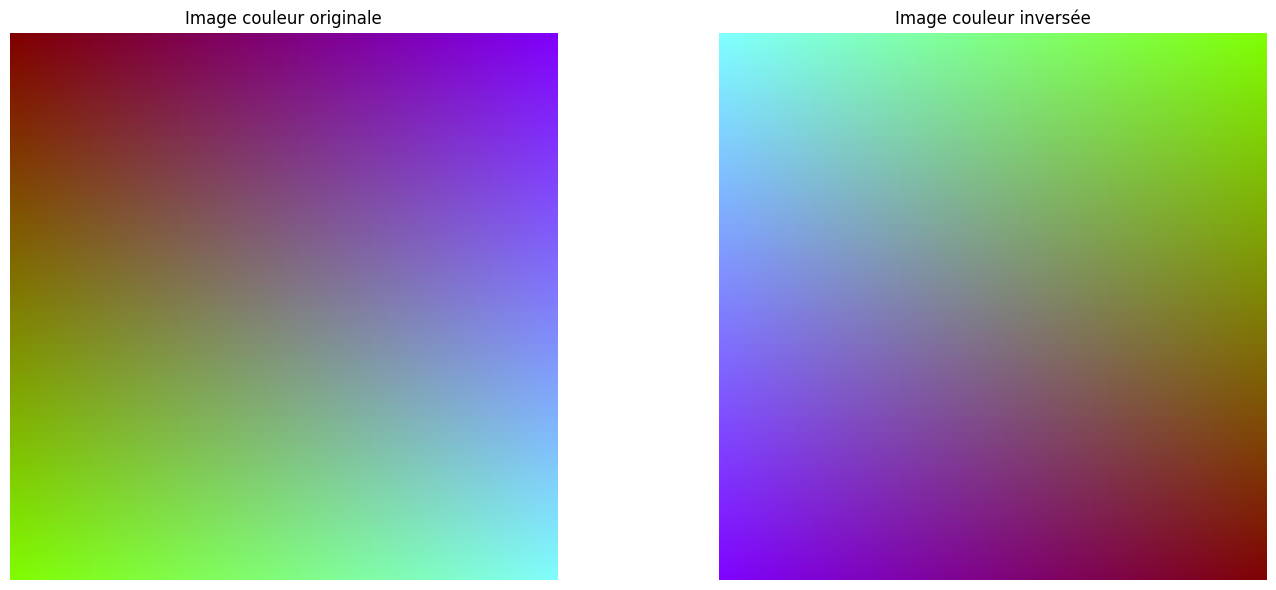

Exercice 2 complété !


In [7]:
def inverse_couleur(image_couleur):
    """
    Inverse une image couleur (traitement indépendant sur chaque canal)
    
    Args:
        image_couleur: Image couleur BGR
    
    Returns:
        Image couleur inversée
    """
    # Créer une copie
    image_inversee = image_couleur.copy()
    
    # Traiter chaque canal indépendamment
    if image_couleur.dtype == np.uint8:
        for y in range(image_couleur.shape[0]):
            for x in range(image_couleur.shape[1]):
                # Inverser chaque canal (B, G, R)
                image_inversee[y, x, 0] = 255 - image_couleur[y, x, 0]  # Blue
                image_inversee[y, x, 1] = 255 - image_couleur[y, x, 1]  # Green
                image_inversee[y, x, 2] = 255 - image_couleur[y, x, 2]  # Red
    
    return image_inversee

# Version vectorisée (plus rapide)
def inverse_couleur_vectorise(image_couleur):
    """
    Version vectorisée de l'inversion d'image couleur
    """
    if image_couleur.dtype == np.uint8:
        return 255 - image_couleur
    return image_couleur

# Créer une image couleur de test
image_couleur_test = np.zeros((100, 100, 3), dtype=np.uint8)
# Créer un dégradé de couleurs
for y in range(100):
    for x in range(100):
        image_couleur_test[y, x, 0] = int(x * 255 / 100)  # Blue
        image_couleur_test[y, x, 1] = int(y * 255 / 100)  # Green
        image_couleur_test[y, x, 2] = 128  # Red constant

# Inverser l'image couleur
image_couleur_inversee = inverse_couleur_vectorise(image_couleur_test)

# Afficher les résultats
afficher_images_cote_a_cote(image_couleur_test, image_couleur_inversee,
                            "Image couleur originale", "Image couleur inversée")

print("Exercice 2 complété !")

## Exercice 3 : Dessiner
Dessiner différentes formes sur une image

1. Image noire créée


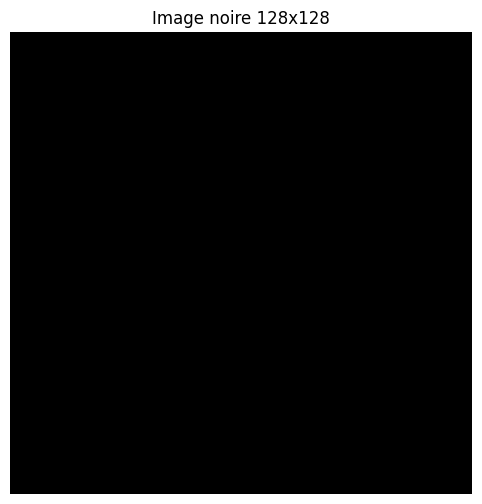

In [5]:
# 1. Créer une image noire de 128x128
image_dessin = np.zeros((128, 128), dtype=np.uint8)

print("1. Image noire créée")
afficher_image(image_dessin, "Image noire 128x128")

2. Ligne horizontale de 100 pixels


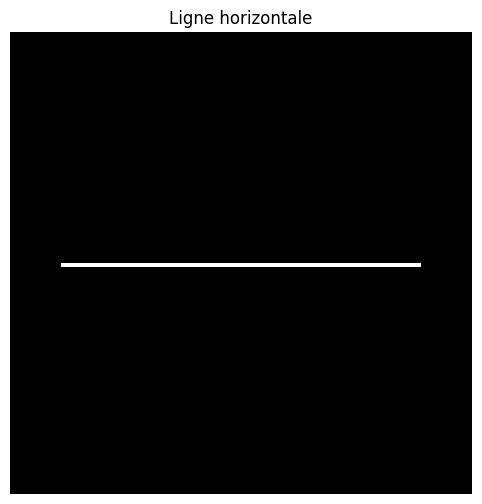

In [6]:
# 2. Dessiner une ligne horizontale de 100 pixels
def dessiner_ligne_horizontale(image, y, x_debut, longueur, couleur=255):
    """
    Dessine une ligne horizontale sur une image
    """
    for x in range(x_debut, x_debut + longueur):
        if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
            image[y, x] = couleur
    return image

image_ligne_h = np.zeros((128, 128), dtype=np.uint8)
image_ligne_h = dessiner_ligne_horizontale(image_ligne_h, y=64, x_debut=14, longueur=100)

print("2. Ligne horizontale de 100 pixels")
afficher_image(image_ligne_h, "Ligne horizontale")

3. Ligne oblique à 45°


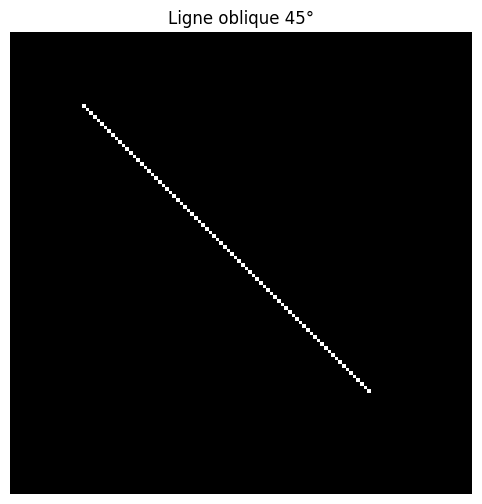

In [8]:
# 3. Dessiner une ligne oblique à 45°
def dessiner_ligne_45_degres(image, x_debut, y_debut, longueur, couleur=255):
    """
    Dessine une ligne oblique à 45°
    """
    for i in range(longueur):
        x = x_debut + i
        y = y_debut + i
        if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
            image[y, x] = couleur
    return image

image_ligne_45 = np.zeros((128, 128), dtype=np.uint8)
image_ligne_45 = dessiner_ligne_45_degres(image_ligne_45, x_debut=20, y_debut=20, longueur=80)

print("3. Ligne oblique à 45°")
afficher_image(image_ligne_45, "Ligne oblique 45°")

4. Ligne entre deux points (10,10) et (100,80)


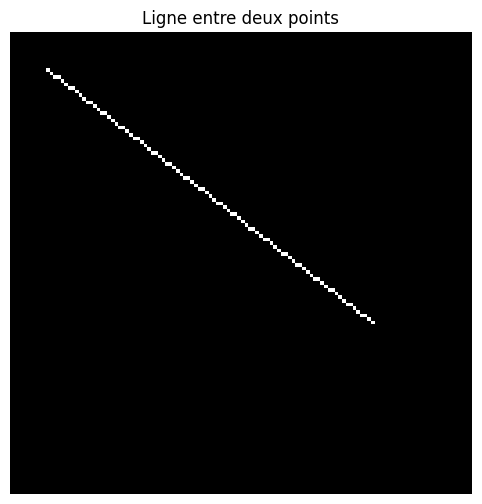

In [9]:
# 4. Dessiner une ligne entre deux pixels (Algorithme de Bresenham simplifié)
def dessiner_ligne(image, x0, y0, x1, y1, couleur=255):
    """
    Dessine une ligne entre deux points en utilisant l'algorithme de Bresenham
    """
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy
    
    x, y = x0, y0
    
    while True:
        if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
            image[y, x] = couleur
        
        if x == x1 and y == y1:
            break
        
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x += sx
        if e2 < dx:
            err += dx
            y += sy
    
    return image

image_ligne_pts = np.zeros((128, 128), dtype=np.uint8)
image_ligne_pts = dessiner_ligne(image_ligne_pts, 10, 10, 100, 80)

print("4. Ligne entre deux points (10,10) et (100,80)")
afficher_image(image_ligne_pts, "Ligne entre deux points")

5. Ligne oblique à 30°


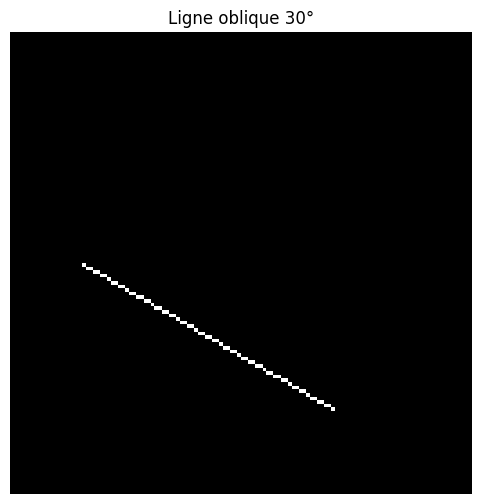

In [10]:
# 5. Dessiner une ligne oblique à 30°
def dessiner_ligne_angle(image, x_debut, y_debut, longueur, angle_degres, couleur=255):
    """
    Dessine une ligne à un angle donné
    """
    angle_rad = np.radians(angle_degres)
    x_fin = int(x_debut + longueur * np.cos(angle_rad))
    y_fin = int(y_debut + longueur * np.sin(angle_rad))
    
    return dessiner_ligne(image, x_debut, y_debut, x_fin, y_fin, couleur)

image_ligne_30 = np.zeros((128, 128), dtype=np.uint8)
image_ligne_30 = dessiner_ligne_angle(image_ligne_30, x_debut=20, y_debut=64, 
                                       longueur=80, angle_degres=30)

print("5. Ligne oblique à 30°")
afficher_image(image_ligne_30, "Ligne oblique 30°")

6. Rectangle


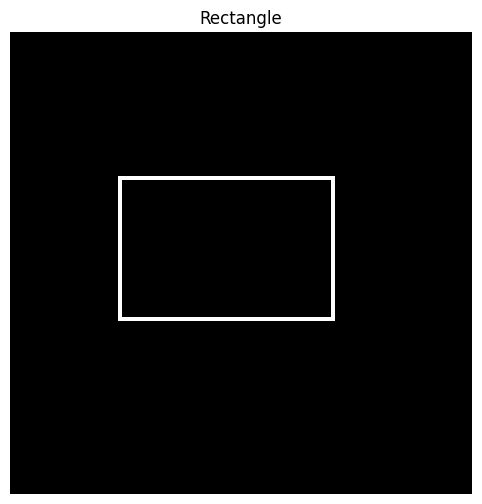

In [11]:
# 6. Dessiner un rectangle
def dessiner_rectangle(image, x, y, largeur, hauteur, couleur=255, rempli=False):
    """
    Dessine un rectangle sur une image
    """
    if rempli:
        for j in range(y, min(y + hauteur, image.shape[0])):
            for i in range(x, min(x + largeur, image.shape[1])):
                image[j, i] = couleur
    else:
        # Dessiner les 4 côtés
        # Haut
        for i in range(x, min(x + largeur, image.shape[1])):
            if 0 <= y < image.shape[0]:
                image[y, i] = couleur
        # Bas
        for i in range(x, min(x + largeur, image.shape[1])):
            if 0 <= y + hauteur - 1 < image.shape[0]:
                image[y + hauteur - 1, i] = couleur
        # Gauche
        for j in range(y, min(y + hauteur, image.shape[0])):
            if 0 <= x < image.shape[1]:
                image[j, x] = couleur
        # Droite
        for j in range(y, min(y + hauteur, image.shape[0])):
            if 0 <= x + largeur - 1 < image.shape[1]:
                image[j, x + largeur - 1] = couleur
    
    return image

image_rectangle = np.zeros((128, 128), dtype=np.uint8)
image_rectangle = dessiner_rectangle(image_rectangle, x=30, y=40, largeur=60, hauteur=40)

print("6. Rectangle")
afficher_image(image_rectangle, "Rectangle")

7. Dégradés de niveaux de gris


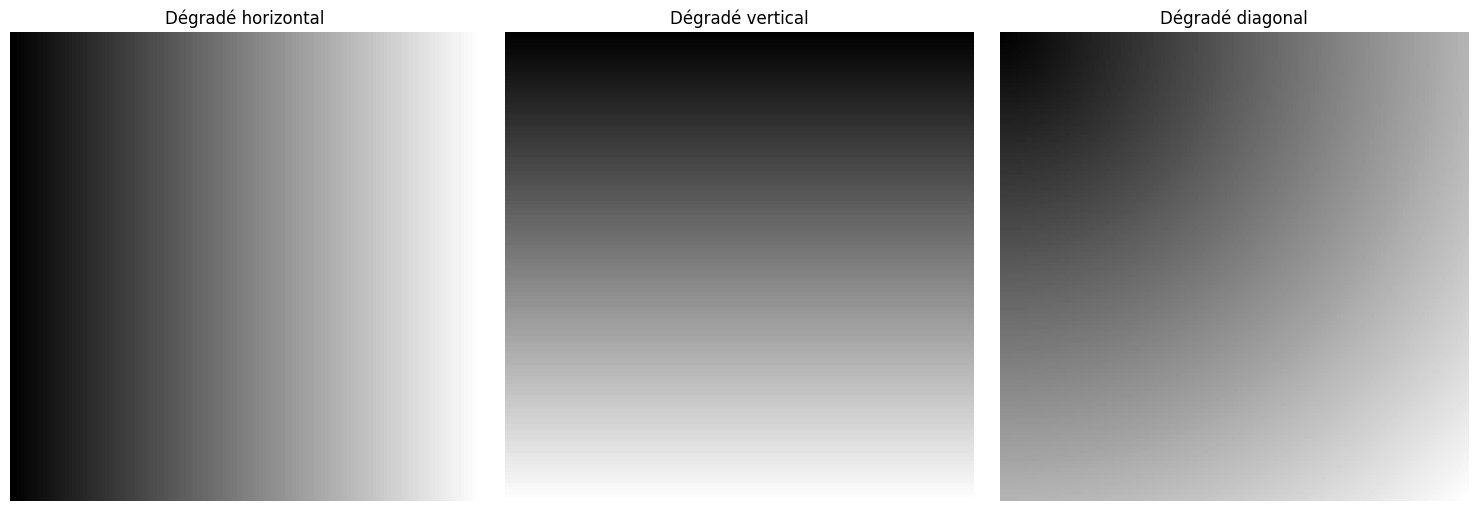

Exercice 3 complété !


In [12]:
# 7. Créer une image en dégradés de niveaux de gris
def creer_degrade_horizontal(hauteur, largeur):
    """
    Crée une image avec un dégradé horizontal de niveaux de gris
    """
    image = np.zeros((hauteur, largeur), dtype=np.uint8)
    
    for y in range(hauteur):
        for x in range(largeur):
            # Dégradé de 0 à 255 de gauche à droite
            image[y, x] = int(x * 255 / (largeur - 1))
    
    return image

def creer_degrade_vertical(hauteur, largeur):
    """
    Crée une image avec un dégradé vertical de niveaux de gris
    """
    image = np.zeros((hauteur, largeur), dtype=np.uint8)
    
    for y in range(hauteur):
        for x in range(largeur):
            # Dégradé de 0 à 255 de haut en bas
            image[y, x] = int(y * 255 / (hauteur - 1))
    
    return image

def creer_degrade_diagonal(hauteur, largeur):
    """
    Crée une image avec un dégradé diagonal de niveaux de gris
    """
    image = np.zeros((hauteur, largeur), dtype=np.uint8)
    
    for y in range(hauteur):
        for x in range(largeur):
            # Dégradé diagonal
            distance = np.sqrt(x**2 + y**2)
            max_distance = np.sqrt(largeur**2 + hauteur**2)
            image[y, x] = int(distance * 255 / max_distance)
    
    return image

# Créer différents dégradés
degrade_h = creer_degrade_horizontal(128, 128)
degrade_v = creer_degrade_vertical(128, 128)
degrade_d = creer_degrade_diagonal(128, 128)

print("7. Dégradés de niveaux de gris")

# Afficher les trois dégradés
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(degrade_h, cmap='gray')
axes[0].set_title('Dégradé horizontal')
axes[0].axis('off')

axes[1].imshow(degrade_v, cmap='gray')
axes[1].set_title('Dégradé vertical')
axes[1].axis('off')

axes[2].imshow(degrade_d, cmap='gray')
axes[2].set_title('Dégradé diagonal')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Exercice 3 complété !")

## Exercice 4 : Inversion aléatoire
Fonction qui retourne une inversion aléatoire des pixels

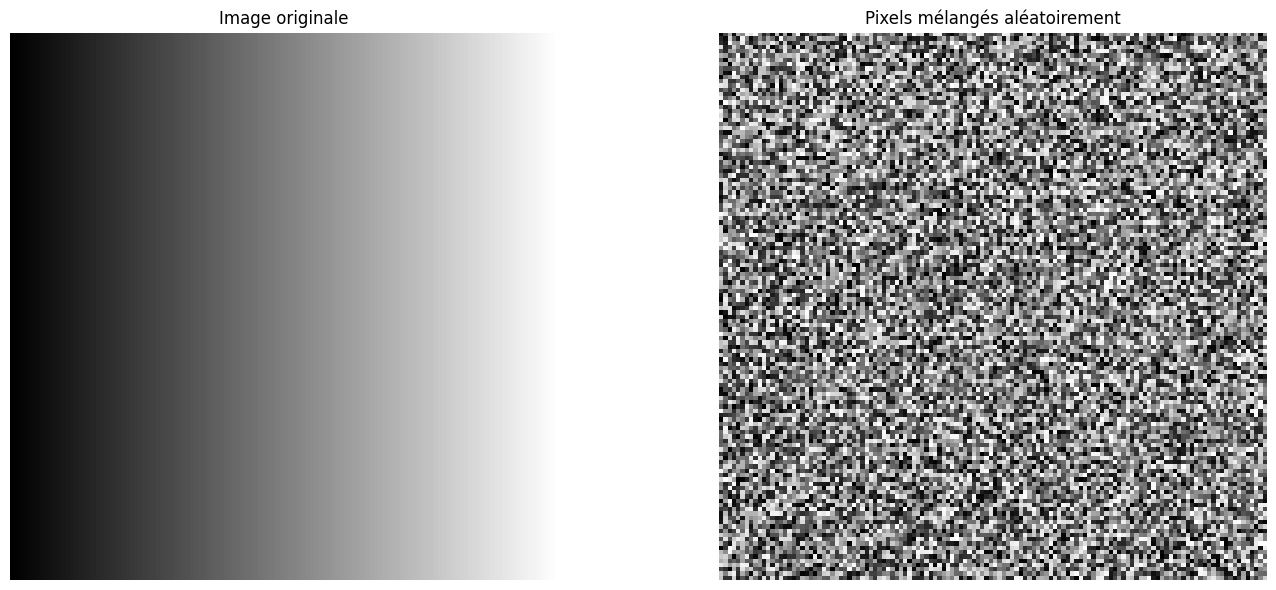

Exercice 4 complété !


In [13]:
def inversion_aleatoire(image):
    """
    Retourne une image avec les pixels mélangés aléatoirement.
    Ne modifie pas l'image d'entrée.
    
    Args:
        image: Image d'entrée
    
    Returns:
        Nouvelle image avec pixels mélangés
    """
    # Créer une copie de l'image
    image_melangee = image.copy()
    
    # Aplatir l'image en un tableau 1D
    if len(image.shape) == 2:  # Image en niveaux de gris
        pixels = image_melangee.flatten()
    else:  # Image couleur
        # Garder la forme originale mais mélanger les pixels
        hauteur, largeur = image.shape[:2]
        pixels = image_melangee.reshape(-1, image.shape[2])
    
    # Mélanger aléatoirement
    np.random.shuffle(pixels)
    
    # Remettre en forme
    if len(image.shape) == 2:
        image_melangee = pixels.reshape(image.shape)
    else:
        image_melangee = pixels.reshape(image.shape)
    
    return image_melangee

# Test avec le dégradé
image_originale = creer_degrade_horizontal(128, 128)
image_aleatoire = inversion_aleatoire(image_originale)

afficher_images_cote_a_cote(image_originale, image_aleatoire,
                            "Image originale", "Pixels mélangés aléatoirement")

print("Exercice 4 complété !")

## Exercice 5 : Extrema d'une image
Fonction qui affiche les valeurs min et max des niveaux de gris

In [14]:
def afficher_extrema(image):
    """
    Affiche les valeurs minimales et maximales des niveaux de gris d'une image.
    
    Args:
        image: Image d'entrée (niveaux de gris)
    """
    # Méthode manuelle avec boucles
    valeur_min = float('inf')
    valeur_max = float('-inf')
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel = image[y, x]
            if pixel < valeur_min:
                valeur_min = pixel
            if pixel > valeur_max:
                valeur_max = pixel
    
    print(f"Valeur minimale: {valeur_min}")
    print(f"Valeur maximale: {valeur_max}")
    
    return valeur_min, valeur_max

def afficher_extrema_vectorise(image):
    """
    Version vectorisée (plus rapide) pour afficher les extrema.
    """
    valeur_min = np.min(image)
    valeur_max = np.max(image)
    
    print(f"Valeur minimale: {valeur_min}")
    print(f"Valeur maximale: {valeur_max}")
    
    return valeur_min, valeur_max

# Test avec le dégradé
print("Test avec un dégradé horizontal:")
image_test = creer_degrade_horizontal(128, 128)
afficher_extrema_vectorise(image_test)

print("\nTest avec l'image mélangée:")
afficher_extrema_vectorise(image_aleatoire)

print("\nExercice 5 complété !")

Test avec un dégradé horizontal:
Valeur minimale: 0
Valeur maximale: 255

Test avec l'image mélangée:
Valeur minimale: 0
Valeur maximale: 255

Exercice 5 complété !


## Exercice 6 : Couleur vers niveau de gris
Convertir une image couleur en niveaux de gris avec la formule v = (r + g + b) / 3

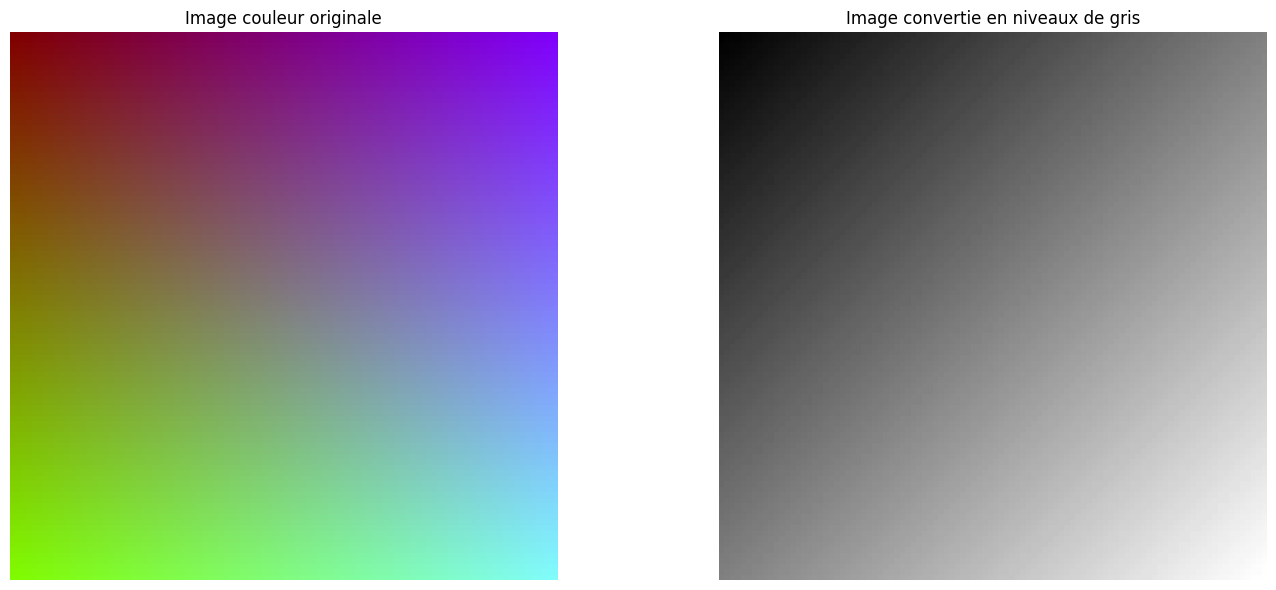

Exercice 6 complété !

Note: OpenCV utilise une formule pondérée pour la conversion:
Y = 0.299*R + 0.587*G + 0.114*B
Cette formule tient compte de la perception humaine des couleurs.


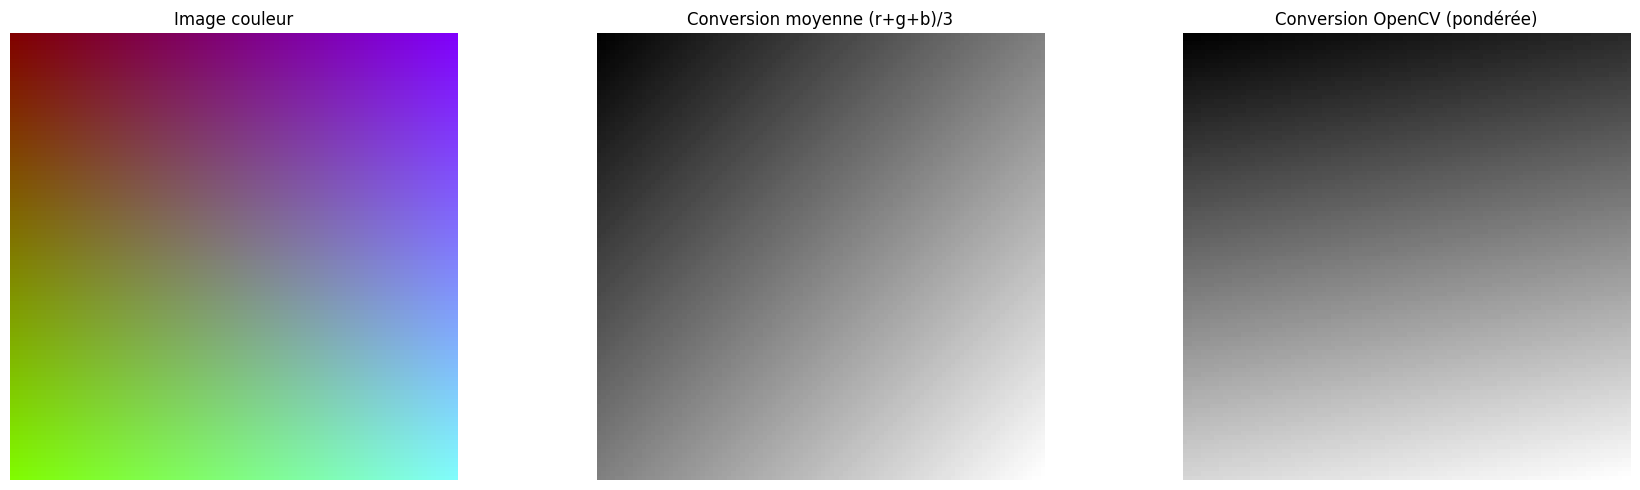

In [15]:
def couleur_vers_gris(image_couleur):
    """
    Convertit une image couleur en niveaux de gris.
    Pour un pixel (r,g,b), la valeur de gris est v = (r + g + b) / 3
    Ne modifie pas l'image d'entrée.
    
    Args:
        image_couleur: Image couleur BGR (format OpenCV)
    
    Returns:
        Image en niveaux de gris
    """
    # Vérifier que c'est bien une image couleur
    if len(image_couleur.shape) != 3 or image_couleur.shape[2] != 3:
        print("Erreur: L'image doit être une image couleur (3 canaux)")
        return image_couleur
    
    hauteur, largeur = image_couleur.shape[:2]
    
    # Créer une nouvelle image en niveaux de gris
    image_gris = np.zeros((hauteur, largeur), dtype=image_couleur.dtype)
    
    # Méthode avec boucles
    for y in range(hauteur):
        for x in range(largeur):
            # OpenCV utilise BGR, pas RGB
            b = image_couleur[y, x, 0]
            g = image_couleur[y, x, 1]
            r = image_couleur[y, x, 2]
            
            # Calculer la moyenne
            if image_couleur.dtype == np.uint8:
                v = int((int(r) + int(g) + int(b)) / 3)
            else:
                v = (r + g + b) / 3.0
            
            image_gris[y, x] = v
    
    return image_gris

def couleur_vers_gris_vectorise(image_couleur):
    """
    Version vectorisée de la conversion couleur vers niveaux de gris.
    """
    if len(image_couleur.shape) != 3 or image_couleur.shape[2] != 3:
        print("Erreur: L'image doit être une image couleur (3 canaux)")
        return image_couleur
    
    # Calculer la moyenne des 3 canaux
    if image_couleur.dtype == np.uint8:
        # Conversion en int pour éviter les débordements
        image_gris = np.mean(image_couleur.astype(np.int16), axis=2).astype(np.uint8)
    else:
        image_gris = np.mean(image_couleur, axis=2)
    
    return image_gris

# Test avec l'image couleur créée précédemment
image_gris = couleur_vers_gris_vectorise(image_couleur_test)

afficher_images_cote_a_cote(image_couleur_test, image_gris,
                            "Image couleur originale", "Image convertie en niveaux de gris")

print("Exercice 6 complété !")

# Comparaison avec la conversion OpenCV standard (pour information)
print("\nNote: OpenCV utilise une formule pondérée pour la conversion:")
print("Y = 0.299*R + 0.587*G + 0.114*B")
print("Cette formule tient compte de la perception humaine des couleurs.")
image_gris_opencv = cv2.cvtColor(image_couleur_test, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].imshow(cv2.cvtColor(image_couleur_test, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image couleur')
axes[0].axis('off')

axes[1].imshow(image_gris, cmap='gray')
axes[1].set_title('Conversion moyenne (r+g+b)/3')
axes[1].axis('off')

axes[2].imshow(image_gris_opencv, cmap='gray')
axes[2].set_title('Conversion OpenCV (pondérée)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Exemple complet : Composition d'effets

In [ ]:
# Créer une image complexe avec plusieurs formes
image_complete = np.zeros((256, 256), dtype=np.uint8)

# Ajouter un dégradé de fond
for y in range(256):
    for x in range(256):
        image_complete[y, x] = int((x + y) * 255 / 510)

# Dessiner plusieurs formes
image_complete = dessiner_rectangle(image_complete, 50, 50, 80, 60, couleur=200)
image_complete = dessiner_rectangle(image_complete, 150, 150, 60, 80, couleur=100, rempli=True)
image_complete = dessiner_ligne(image_complete, 20, 20, 230, 230, couleur=255)
image_complete = dessiner_ligne(image_complete, 230, 20, 20, 230, couleur=255)

# Appliquer différents traitements
image_inversee = inverse_vectorise(image_complete)

# Afficher le résultat final
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(image_complete, cmap='gray')
axes[0].set_title('Image avec formes et dégradé')
axes[0].axis('off')

axes[1].imshow(image_inversee, cmap='gray')
axes[1].set_title('Image inversée')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\n=== TOUS LES EXERCICES SONT COMPLÉTÉS ===")
print("\nRésumé des fonctions implémentées:")
print("1. Inversion d'image (niveaux de gris et couleur)")
print("2. Dessin de lignes (horizontales, obliques, entre deux points)")
print("3. Dessin de rectangles (vides et remplis)")
print("4. Création de dégradés")
print("5. Mélange aléatoire de pixels")
print("6. Calcul des extrema d'une image")
print("7. Conversion couleur vers niveaux de gris")

## Test avec l'image noidea.jpg
Application de tous les traitements sur l'image réelle

Image chargée depuis: noidea.jpg
Dimensions de l'image: 625x414 pixels
Type de données: uint8


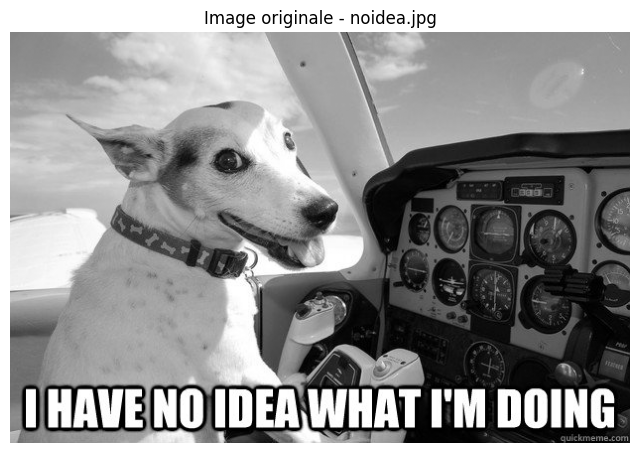


=== Extrema de l'image ===
Valeur minimale: 0
Valeur maximale: 255

=== Inversion de l'image ===


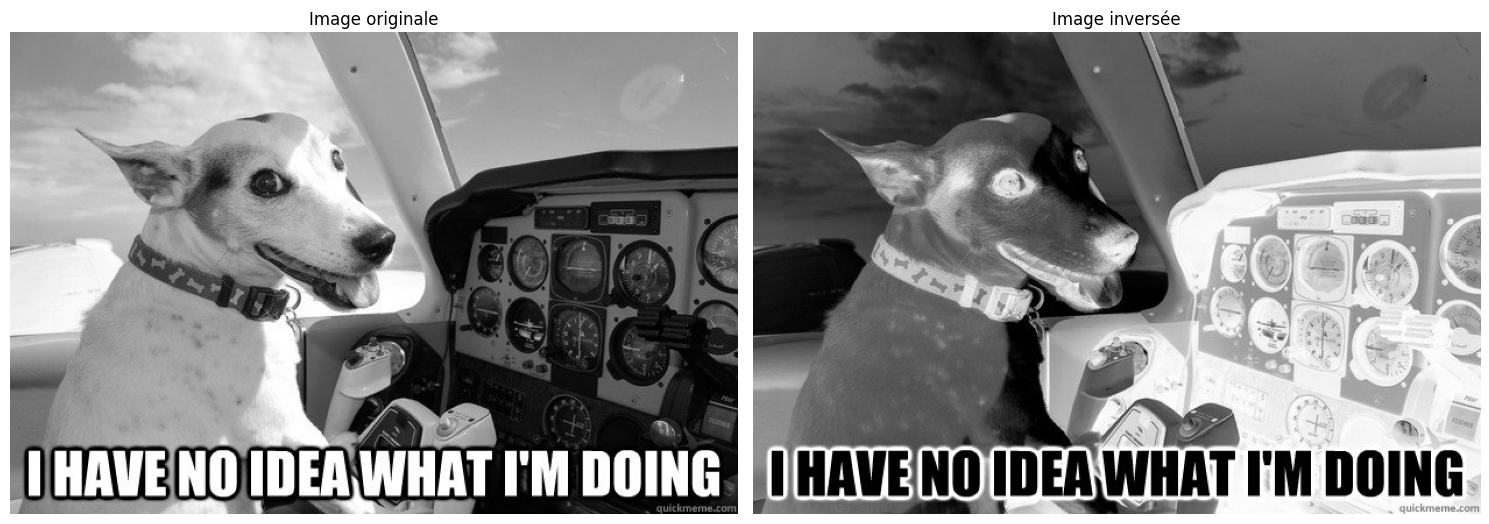

In [16]:
import os

# Essayer de charger l'image noidea.jpg
image_path = 'noidea.jpg'

# Vérifier plusieurs emplacements possibles
possible_paths = [
    'noidea.jpg',
    './noidea.jpg',
    '../noidea.jpg',
    '/mnt/user-data/uploads/noidea.jpg'
]

image_reelle = None
for path in possible_paths:
    if os.path.exists(path):
        image_reelle = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image_reelle is not None:
            print(f"Image chargée depuis: {path}")
            break

if image_reelle is not None:
    print(f"Dimensions de l'image: {image_reelle.shape[1]}x{image_reelle.shape[0]} pixels")
    print(f"Type de données: {image_reelle.dtype}")
    
    # Afficher l'image originale
    afficher_image(image_reelle, "Image originale - noidea.jpg")
    
    # 1. Afficher les extrema
    print("\n=== Extrema de l'image ===")
    afficher_extrema_vectorise(image_reelle)
    
    # 2. Inversion de l'image
    print("\n=== Inversion de l'image ===")
    image_inversee = inverse_vectorise(image_reelle)
    afficher_images_cote_a_cote(image_reelle, image_inversee,
                                "Image originale", "Image inversée")
    
else:
    print("❌ Image 'noidea.jpg' non trouvée.")
    print("\nPour utiliser votre image:")
    print("1. Placez 'noidea.jpg' dans le même dossier que ce notebook")
    print("2. Ou modifiez le chemin dans la cellule ci-dessus")
    print("3. Exécutez à nouveau cette cellule")

## Test avec l'image couleur noidea.jpg

Image couleur chargée: 625x414 pixels
Nombre de canaux: 3


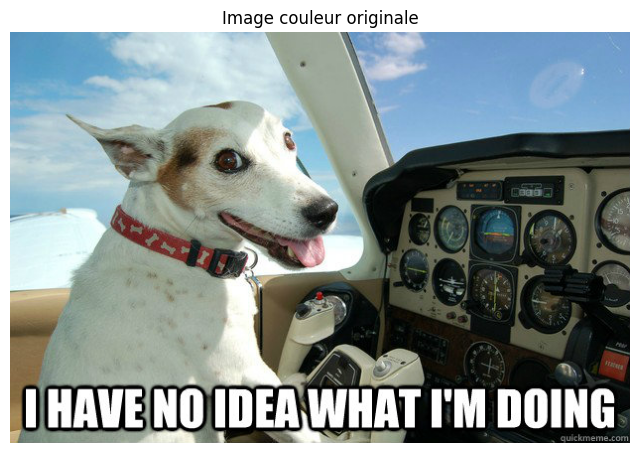


=== Inversion de l'image couleur ===


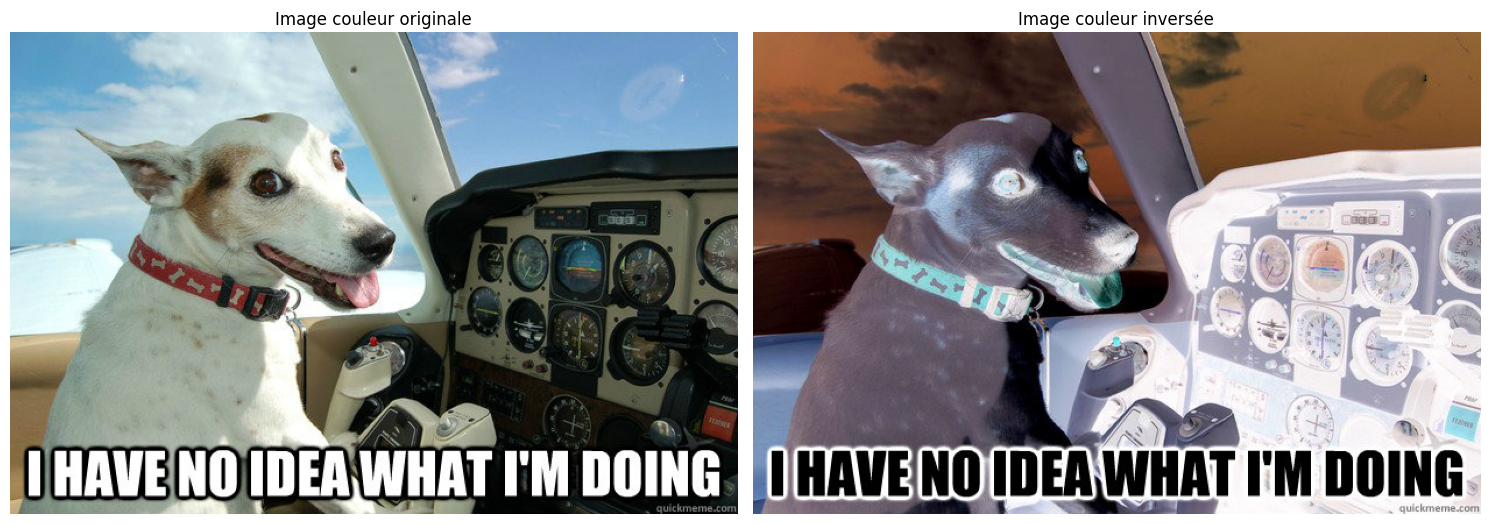


=== Conversion en niveaux de gris ===


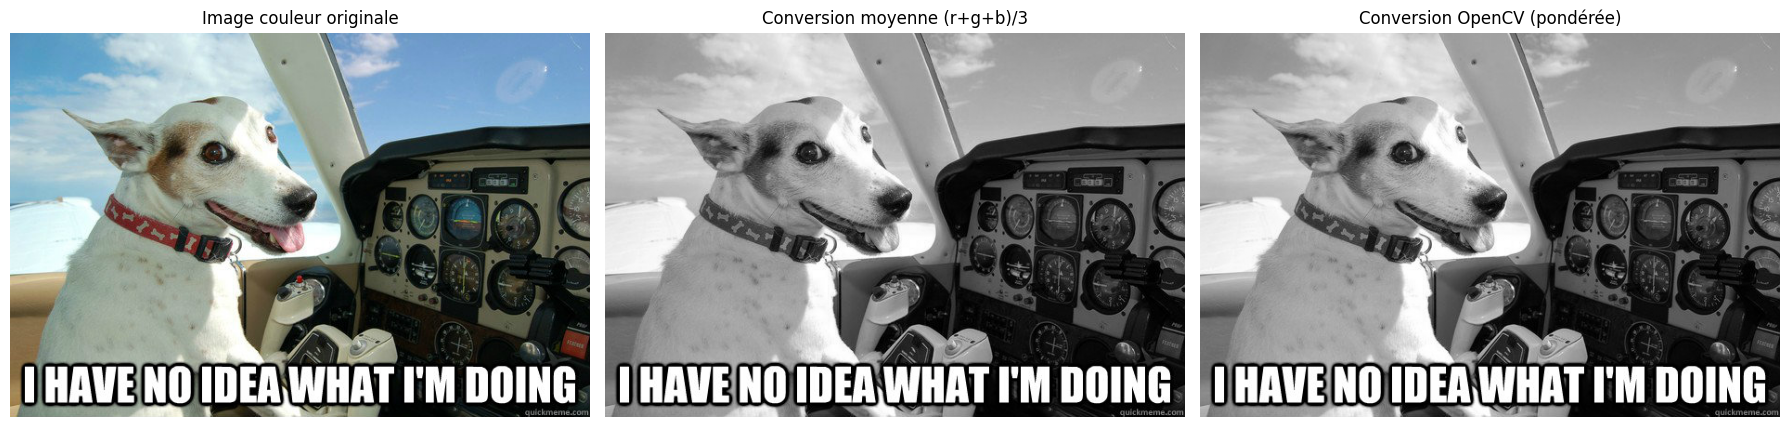


=== Inversion de l'image en niveaux de gris ===


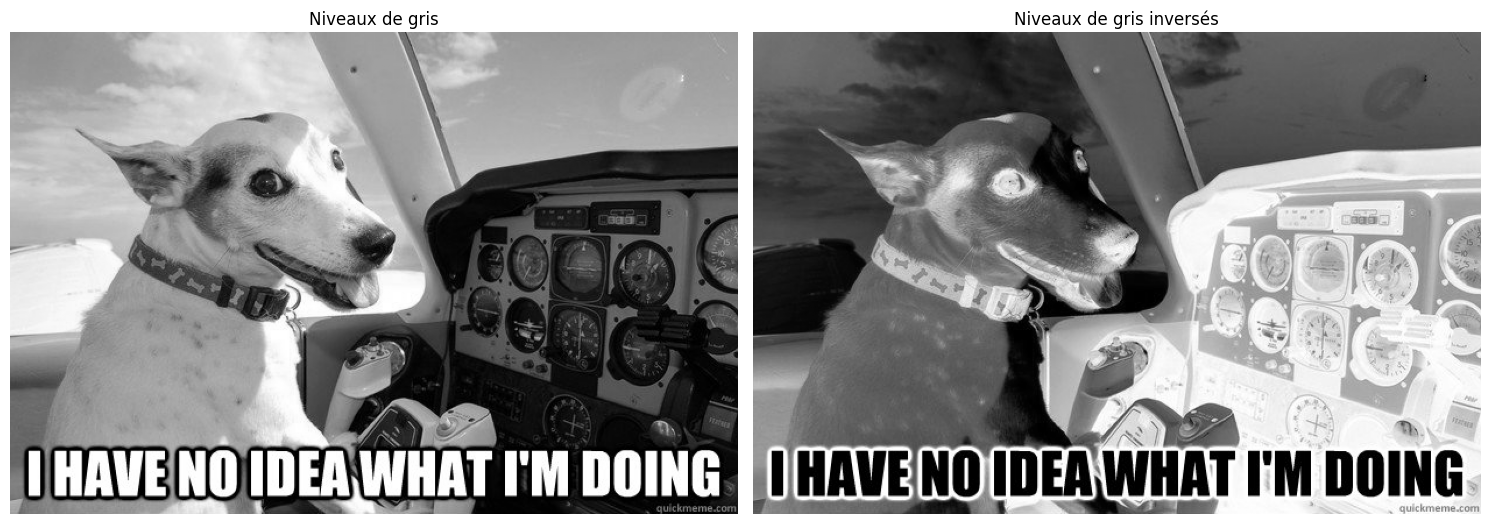

In [17]:
# Charger l'image en couleur
image_couleur_reelle = None
for path in possible_paths:
    if os.path.exists(path):
        image_couleur_reelle = cv2.imread(path, cv2.IMREAD_COLOR)
        if image_couleur_reelle is not None:
            break

if image_couleur_reelle is not None:
    print(f"Image couleur chargée: {image_couleur_reelle.shape[1]}x{image_couleur_reelle.shape[0]} pixels")
    print(f"Nombre de canaux: {image_couleur_reelle.shape[2]}")
    
    # 1. Afficher l'image couleur originale
    afficher_image(image_couleur_reelle, "Image couleur originale")
    
    # 2. Inversion de l'image couleur
    print("\n=== Inversion de l'image couleur ===")
    image_couleur_inv = inverse_couleur_vectorise(image_couleur_reelle)
    afficher_images_cote_a_cote(image_couleur_reelle, image_couleur_inv,
                                "Image couleur originale", "Image couleur inversée")
    
    # 3. Conversion en niveaux de gris
    print("\n=== Conversion en niveaux de gris ===")
    image_gris_custom = couleur_vers_gris_vectorise(image_couleur_reelle)
    image_gris_opencv = cv2.cvtColor(image_couleur_reelle, cv2.COLOR_BGR2GRAY)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].imshow(cv2.cvtColor(image_couleur_reelle, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image couleur originale')
    axes[0].axis('off')
    
    axes[1].imshow(image_gris_custom, cmap='gray')
    axes[1].set_title('Conversion moyenne (r+g+b)/3')
    axes[1].axis('off')
    
    axes[2].imshow(image_gris_opencv, cmap='gray')
    axes[2].set_title('Conversion OpenCV (pondérée)')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Inversion de l'image en niveaux de gris
    print("\n=== Inversion de l'image en niveaux de gris ===")
    image_gris_inv = inverse_vectorise(image_gris_custom)
    afficher_images_cote_a_cote(image_gris_custom, image_gris_inv,
                                "Niveaux de gris", "Niveaux de gris inversés")
    
else:
    print("❌ Image couleur non trouvée.")

## Analyse complète de l'image noidea.jpg

ANALYSE COMPLÈTE DE L'IMAGE NOIDEA.JPG

📊 STATISTIQUES DE BASE:
  • Dimensions: 625 x 414 pixels
  • Nombre total de pixels: 258,750
  • Type de données: uint8
Valeur minimale: 0
Valeur maximale: 255
  • Plage dynamique: 255
  • Valeur moyenne: 130.15
  • Écart-type: 77.21
  • Médiane: 151.00


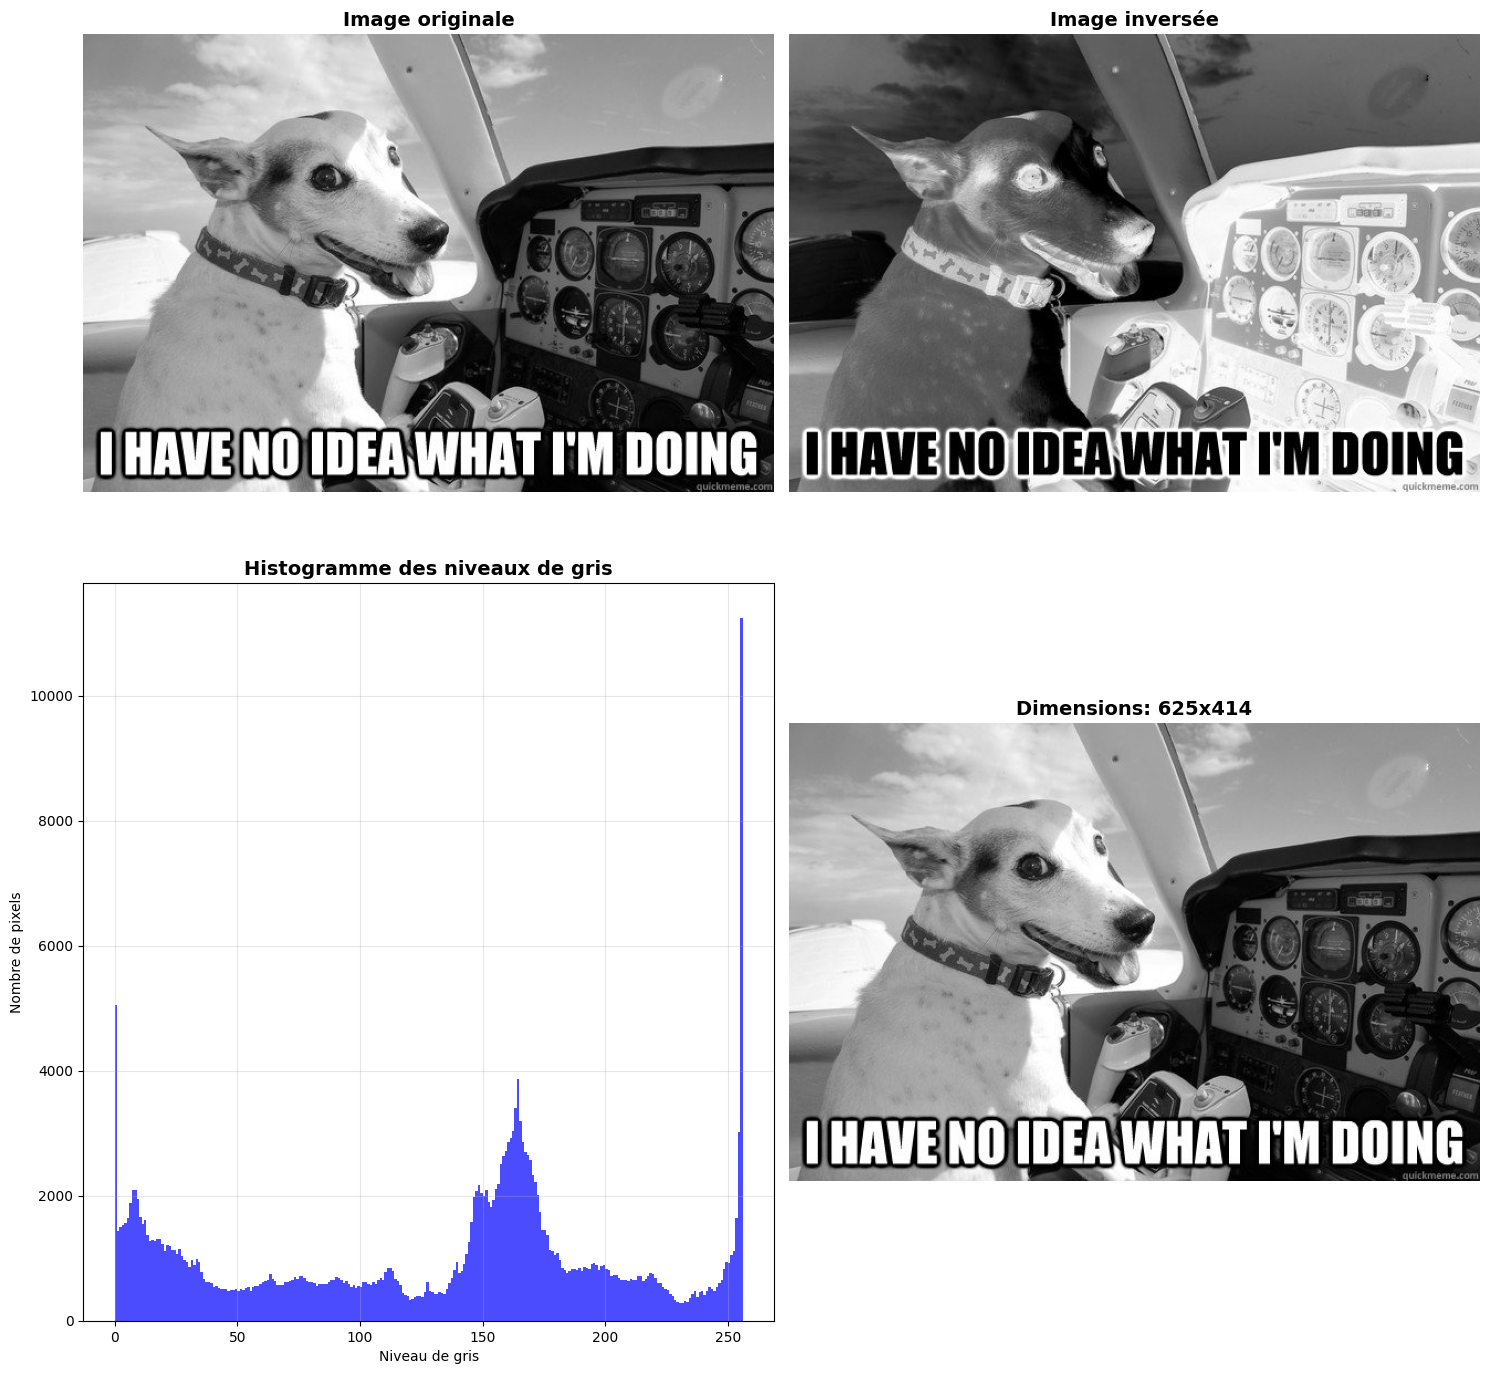


✅ Analyse complète terminée!


In [18]:
if image_reelle is not None:
    print("=" * 60)
    print("ANALYSE COMPLÈTE DE L'IMAGE NOIDEA.JPG")
    print("=" * 60)
    
    # Statistiques de base
    print("\n📊 STATISTIQUES DE BASE:")
    print(f"  • Dimensions: {image_reelle.shape[1]} x {image_reelle.shape[0]} pixels")
    print(f"  • Nombre total de pixels: {image_reelle.shape[0] * image_reelle.shape[1]:,}")
    print(f"  • Type de données: {image_reelle.dtype}")
    
    # Extrema
    min_val, max_val = afficher_extrema_vectorise(image_reelle)
    print(f"  • Plage dynamique: {max_val - min_val}")
    
    # Statistiques avancées
    print(f"  • Valeur moyenne: {np.mean(image_reelle):.2f}")
    print(f"  • Écart-type: {np.std(image_reelle):.2f}")
    print(f"  • Médiane: {np.median(image_reelle):.2f}")
    
    # Créer une grille de visualisations
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    
    # Image originale
    axes[0, 0].imshow(image_reelle, cmap='gray')
    axes[0, 0].set_title('Image originale', fontsize=14, fontweight='bold')
    axes[0, 0].axis('off')
    
    # Image inversée
    axes[0, 1].imshow(inverse_vectorise(image_reelle), cmap='gray')
    axes[0, 1].set_title('Image inversée', fontsize=14, fontweight='bold')
    axes[0, 1].axis('off')
    
    # Histogramme
    axes[1, 0].hist(image_reelle.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    axes[1, 0].set_title('Histogramme des niveaux de gris', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Niveau de gris')
    axes[1, 0].set_ylabel('Nombre de pixels')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Image avec annotations
    axes[1, 1].imshow(image_reelle, cmap='gray')
    axes[1, 1].set_title(f'Dimensions: {image_reelle.shape[1]}x{image_reelle.shape[0]}', 
                         fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel(f'Min: {min_val} | Max: {max_val} | Moyenne: {np.mean(image_reelle):.1f}')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Analyse complète terminée!")
else:
    print("⚠️ Veuillez d'abord charger l'image noidea.jpg")